In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
County_MedianListingPrice_AllHomes = "County_MedianListingPrice_AllHomes.csv"
DaysOnZillow_County = "DaysOnZillow_County.csv"
Sale_Counts_County = "Sale_Counts_County.csv"



# Read the Mouse and Drug Data and the Clinical Trial Data
Price = pd.read_csv(County_MedianListingPrice_AllHomes, encoding="ISO-8859-1")
Days = pd.read_csv(DaysOnZillow_County, encoding="ISO-8859-1")
Sale = pd.read_csv(Sale_Counts_County, encoding="ISO-8859-1")



Price = Price.dropna(how='all')
Days = Days.dropna(how='all')
Sale = Sale.dropna(how='all')



In [2]:
#Remove Columns
Sales = Sale.drop(labels=['RegionID','StateName','SizeRank','2008-03', '2008-04', '2008-05', '2008-06', '2008-07', 
                          '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01',
                          '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', 
                          '2009-08', '2009-09', '2009-10', '2009-11', '2009-12'], axis=1)

Prices = Price.drop(labels=['State', 'Metro', 'StateCodeFIPS', 'MunicipalCodeFIPS','SizeRank'],axis=1) 
Days = Days.drop(labels=['SizeRank', 'RegionID', 'RegionType', 'StateName'],axis=1)

#sale_.head(1)

In [3]:
#Add extra column for each table

Days['Type']='Day'
Sales['Type']='Sale'
Prices['Type']='Price'

In [4]:
# 

PD = Prices.append(Days, ignore_index=True)
PDM = PD.append(Sales, ignore_index=True)
PDM.shape





(5919, 115)

In [5]:
#Merge two cells in one
PDM["County"] = PDM["RegionName"].map(str) + PDM["Type"]

In [6]:
#tanspose table
PDM.set_index(['County'],inplace=True)
PDM_ = PDM.transpose()


PDM_.head(1)

County,Los Angeles CountyPrice,Cook CountyPrice,Harris CountyPrice,Maricopa CountyPrice,San Diego CountyPrice,Orange CountyPrice,Kings CountyPrice,Miami-Dade CountyPrice,Dallas CountyPrice,Queens CountyPrice,...,Mineral CountySale,McMullen CountySale,San Juan CountySale,Banner CountySale,Yakutat BoroughSale,Thomas CountySale,McPherson CountySale,Petroleum CountySale,Blaine CountySale,Kenedy CountySale
2010-01,399000,244900,149900,179900,399000,550000,459000,NaN,159900,409000,...,0,0,0,0,0,0,0,0,0,0


In [7]:
PDM_ = PDM_.convert_objects(convert_numeric=True)

In [10]:
### PDM.shape
found=["Los Angeles" in column for column in PDM_.columns]
indexes=[i for i,x in enumerate(found) if x]
indexes

Subset_LA=PDM_.iloc[:,[0, 2248, 3247]]
Subset_LA.head(3)

County,Los Angeles CountyPrice,Los Angeles CountyDay,Los Angeles CountySale
2010-01,399000.0,117.0,4882.0
2010-02,389000.0,125.0,5168.0
2010-03,399000.0,116.0,6889.0


In [113]:
# Subset_LA['Los Angeles CountyPrice'] = Subset_LA['Los Angeles CountyPrice'].convert_objects(convert_numeric=True)
# Subset_LA['Los Angeles CountyDay'] = Subset_LA['Los Angeles CountyDay'].convert_objects(convert_numeric=True)
# Subset_LA['Los Angeles CountySale'] = Subset_LA['Los Angeles CountySale'].convert_objects(convert_numeric=True)
Subset_LA.dtypes

County
Los Angeles CountyPrice    float64
Los Angeles CountyDay      float64
Los Angeles CountySale     float64
dtype: object

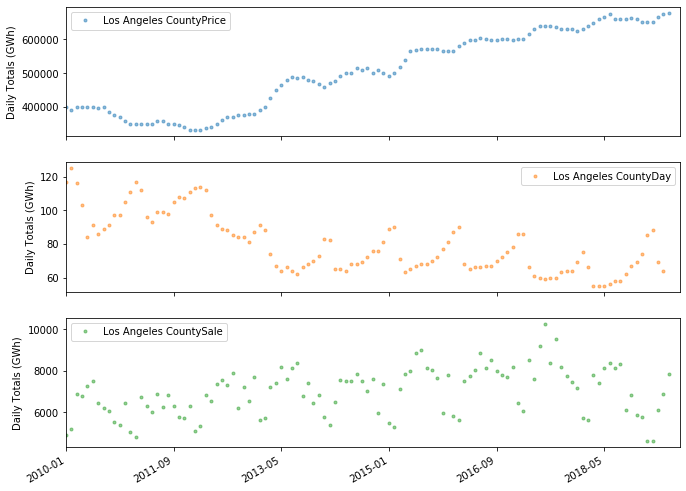

In [114]:
#Subset_LA['Los Angeles CountyPrice'] = Subset_LA['Los Angeles CountyPrice'].astype(float)
cols_plot = ['Los Angeles CountyPrice', 'Los Angeles CountyDay', 'Los Angeles CountySale']
axes = Subset_LA[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

In [2]:
import seaborn as sns
#pip install seaborn
#conda install seaborn

ModuleNotFoundError: No module named 'seaborn'

In [122]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in cols_plot(['Consumption', 'Solar', 'Wind'], axes):
sns.boxplot(data=opsd_daily, x='Month', y=name, ax=ax)
ax.set_ylabel('GWh')
ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
ax.set_xlabel('')


IndentationError: expected an indented block (<ipython-input-122-c7e4c370c00f>, line 3)

In [103]:

# x=[PDM_.index.values
# y=Subset_LA['Los Angeles CountyPrice']
# plt.plot(x,y)
# plt.show()

In [50]:
# M_table = Sales.merge(Prices, on=['RegionName'], suffixes=(' Sale', ' Price'))
# M_table = M_table.merge(Days, on=['RegionName'], suffixes=('Days', ''))


# columnnames = Days.columns.tolist()
# for col in columnnames:
#     if col != "RegionName":
#         M_table = M_table.rename(columns={col: f"{col} Day"})
        
# M_table.head(5)